# MSDS 432, Assignment 7 - Dijkstra's Algorithm

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import deque, defaultdict

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Helper Utilities

In [6]:
infinity = float("inf")

## Sample Data

In [21]:
%%html
<img src="img/RoadTrip_NYC_to_L.A.jpg",width=60,height=60>

Initialize each of our nodes in the graph

In [7]:
graph = {}
graph['NYC'] = {}
graph['DC'] = {}
graph['Atlanta'] = {}
graph['New Orleans'] = {}
graph['Dallas'] = {}
graph['Indianapolis'] = {}
graph['Kansas City'] = {}
graph['Denver'] = {}
graph['Pittsburgh'] = {}
graph['Cincinatti'] = {}
graph['St Louis'] = {}
graph['OK City'] = {}
graph['Alburqurque'] = {}
graph['Salt Lake City'] = {}
graph['Phoenix'] = {}
graph['Las Vegas'] = {}
graph['San Diego'] = {}
graph['Los Angeles'] = {}

Neighbor relationships

In [8]:
graph['NYC']['DC'] = 2
graph['NYC']['Pittsburgh'] = 7
graph['NYC']['Indianapolis'] = 11

graph['DC']['Atlanta'] = 2
graph['Atlanta']['New Orleans'] = 2
graph['New Orleans']['Dallas'] = 2
graph['Dallas']['Alburqurque'] = 2
graph['Alburqurque']['Phoenix'] = 2
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5
graph['San Diego']['Los Angeles'] = 2
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5

graph['Indianapolis']['Kansas City'] = 8
graph['Kansas City']['Denver'] = 7
graph['Denver']['Salt Lake City'] = 6
graph['Salt Lake City']['Las Vegas'] = 9

graph['Pittsburgh']['Cincinatti'] = 6
graph['Cincinatti']['St Louis'] = 8
graph['St Louis']['OK City'] = 7
graph['OK City']['Alburqurque'] = 9

Cost table

In [9]:
costs = {}
costs['NYC'] = 0
costs['DC'] = 2
costs['Atlanta'] = 2
costs['New Orleans'] = 2
costs['Dallas'] = 2
costs['Indianapolis'] = 11
costs['Kansas City'] = 7
costs['Denver'] = infinity
costs['Pittsburgh'] = 7
costs['Cincinatti'] = infinity
costs['St Louis'] = infinity
costs['OK City'] = infinity
costs['Alburqurque'] = 2
costs['Salt Lake City'] = 9
costs['Phoenix'] = 2
costs['Las Vegas'] = 2
costs['San Diego'] = 5
costs['Los Angeles'] = infinity

Initialize Parents

In [10]:
parents = {}

parents['DC'] = 'NYC'
parents['Atlanta'] = 'DC'
parents['New Orleans'] = 'Atlanta'
parents['Dallas'] = 'New Orleans'
parents['Indianapolis'] = 'NYC'
parents['Kansas City'] = 'Indianapolis'
parents['Denver'] = 'Kansas City'
parents['Pittsburgh'] = 'NYC'
parents['Cincinatti'] = 'Pittsburgh'
parents['St Louis'] = 'Cincinatti'
parents['OK City'] = 'St Louis'
parents['Alburqurque'] = 'Dallas'
parents['Salt Lake City'] = 'Denver'
parents['Phoenix'] = 'Alburqurque'
parents['Las Vegas'] = 'Phoenix'
parents['San Diego'] = 'Phoenix'
parents['Los Angeles'] = 'San Diego'

processed = []

### Search Functions

In [11]:
def BFS(graph, start, finish):
    # keep track of processed nodes
    processed = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == finish:
        return "Arrived."
 
    # We need to check all possible paths
    while queue:
        # Take the first path
        path = queue.pop(0)
        # Find the last possible destination on this path
        node = path[-1]
        if node not in processed:
            neighbors = graph[node]
            # go through all neighbor nodes, make a new path and
            # push it into the queue
            for neighbor in neighbors:
                newPath = list(path)
                newPath.append(neighbor)
                queue.append(newPath)
                # return path if neighbour is goal
                if neighbor == finish:
                    cost = getRouteCost(newPath)
                    return (newPath, cost)
 
            # mark node as processed
            processed.append(node)
 
    # in case there's no path between the 2 nodes
    return "There is no route."

# function to find the lowest cost node, check neighboring costs, and updating
# the costs and parents to reflect the cheapest path
def findLowestCostNode(costs):
    lowestCost = float("inf")
    lowestCostNode = None
    for node in costs:
        cost = costs[node]
        if cost < lowestCost and node not in processed:
            lowestCost = cost
            lowestCostNode = node
    return lowestCostNode

# implementation of Dijkstra's Algorithm for weighted graph traversal
def dijkstra(graph, costs, dest):
    totalCost = 0
    path = []
    node = findLowestCostNode(costs) # Find lowest cost, unprocessed node
    while node is not None and node != dest: # While loop ends when all nodes have been processed
        path.append(node)
        cost = costs[node]
        
        totalCost += cost
        neighbors = graph[node]
        
        for n in neighbors.keys(): # Go through all neighors of node in question
            newCost = cost + neighbors[n] # Find cost to get to node through neighbor
            if costs[n] > newCost: # If it is cheaper this way
                costs[n] = newCost # update the cost to reflect this
                parents[n] = node # This node is now the parent of the neighbor
        processed.append(node) # mark the node as processed
        node = findLowestCostNode(costs) # Process the next node and loop
    
    path.append(node)
    return (path, totalCost)

def getRouteCost(path):
    cost = 0
    for index in range(len(path)-1):
        cost += graph[path[index]][path[index+1]]
    return cost

## Benchmark

In [12]:
bfsPath = BFS(graph, 'NYC', 'Los Angeles')
djkPath = dijkstra(graph, costs, 'Los Angeles')

#### Breadth-First Search

In [13]:
print("The shortest route is: {0}, total cost: {1}".format(bfsPath[0], bfsPath[1]))

The shortest route is: ['NYC', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles'], total cost: 46


#### Dijkstra's

In [14]:
print("The cheapest route is: {0}, total cost: {1}".format(djkPath[0], djkPath[1]))

The cheapest route is: ['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas', 'Alburqurque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles'], total cost: 18


### Results

In [15]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Method', 'Length', 'Cost'])

results.loc[0] = ['BFS', len(bfsPath[0]), bfsPath[1]]
results.loc[1] = ['Dijkstra', len(djkPath[0]), djkPath[1]]

In [16]:
results

,Method,Length,Cost
0,BFS,7,46
1,Dijkstra,10,18


## Summary

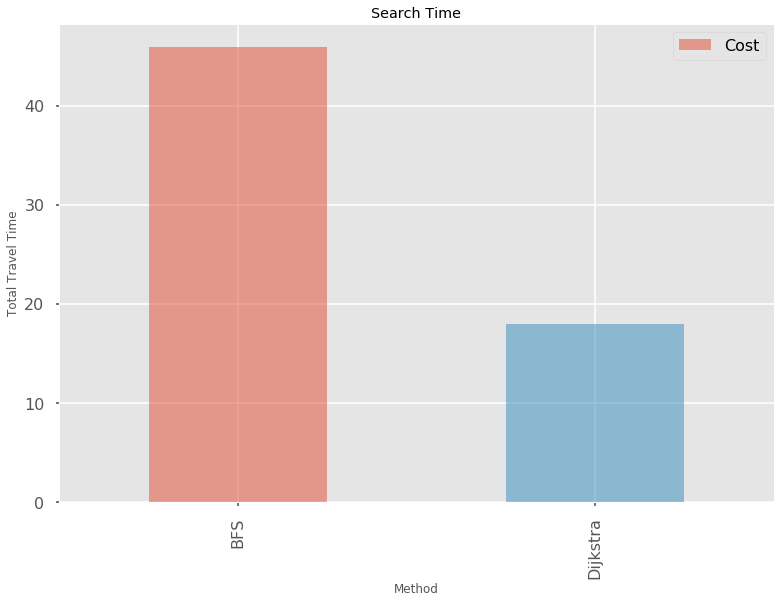

In [17]:
results.plot.bar(x='Method', y='Cost', align='center', alpha=0.5)
plt.ylabel('Total Travel Time')
plt.title('Search Time')

plt.show()

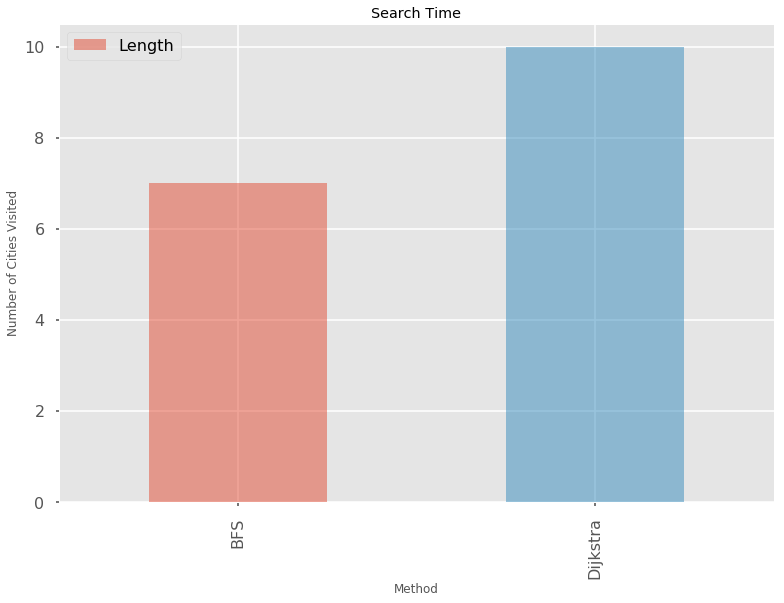

In [18]:
results.plot.bar(x='Method', y='Length', align='center', alpha=0.5)
plt.ylabel('Number of Cities Visited')
plt.title('Search Time')

plt.show()

In this lab we compare two methods of graph traversal, namely breadth-first search and Dijkstra’s algorithm. The two methods are similar conceptually, however the important distinguishing feature of Dijkstra’s algorithm is that it supports the notion of graph edges having associated weightings that make the traversal of the graph a function of looking for the lowest (or perhaps, the highest) cost from a given point A -> B.

We should note here that if we had a graph with all equal weighting, Dijkstra’s algorithm would behave identically to that of the breadth-first search. In the lab, we demonstrate a simple path like that one that might be generated using a GPS system when traveling from New York to Los Angles. Here, each node is connected to one or more nodes using a nested dictionary, and there is a separate cost look-up tables for the associations that determine the weighing for the edges (time spent on a given path).

The performance of the algorithms is quite drastic as we might expect due to the breadth-first search just taking a naive approach that ignores the weights of the edges. The BFS algorithm does in fact visit less cities as we see in the second chart above, however, this is not a useful metric for this exercise as we are only concerned about minimizing the distance between the first and last nodes. Given these constraints, Dijkstra’s algorithm performs exceptionally well, yielding a final score of 18 to the 41 given by the BFS approach.

Graphs and nested data structures are useful for data engineers in general due to their ability to closely model problems that have a hierarchical nature. Examples of these include network or path traversal problems, garbage collection (reference tracking) and recursively defined datasets. Having a strategy to deal with iterating this type of data is essential for anyone working with complex data definitions such as these.
